<a href="https://colab.research.google.com/github/narutaku0914/KIKAGAKU/blob/master/kikagaku_dl1class.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# ニューラルネットワークの実装（分類）

In [ ]:
import tensorflow as tf

# バージョン確認
print(tf.__version__)

2.2.0


In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

### DataSetの準備

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive


データセットの準備 (マウントしていないとき)
from google.colab import files
uploaded = files.upload()

In [ ]:
# 読み込み
df = pd.read_csv('/content/drive/My Drive/KIKAGAKU/wine_class.csv')

df.head(3)

,Class,Alcohol,Ash,Alcalinity of ash,Magnesium,Total phenols,Flavanoids,Nonflavanoid phenols,Color intensity,Hue,Proline
0,1,14.23,2.43,15.6,127,2.80,3.06,0.28,5.64,1.04,1065
1,1,13.20,2.14,11.2,100,2.65,2.76,0.26,4.38,1.05,1050
2,1,13.16,2.67,18.6,101,2.80,3.24,0.30,5.68,1.03,1185


入力変数と目的変数に切り分け

In [ ]:
# 目的変数
t = df['Class']

# 入力変数
x = df.drop('Class', axis=1)

x.head(3)

,Alcohol,Ash,Alcalinity of ash,Magnesium,Total phenols,Flavanoids,Nonflavanoid phenols,Color intensity,Hue,Proline
0,14.23,2.43,15.6,127,2.80,3.06,0.28,5.64,1.04,1065
1,13.20,2.14,11.2,100,2.65,2.76,0.26,4.38,1.05,1050
2,13.16,2.67,18.6,101,2.80,3.24,0.30,5.68,1.03,1185


In [ ]:
# 形
x.shape

(178, 10)

(サンプル数, 入力変数)

In [ ]:
type(x.values)  # .valuesでndarrayに変換 → 頻出！

numpy.ndarray

In [ ]:
# ユニークな数値を確認
np.unique(t)

array([1, 2, 3])

目標値は0から始める必要あるため0,1,2に変える

In [ ]:
# 0start, ndarayに変換
t = t.values -1
x = x.values

In [ ]:
t, type(t)

(array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1,
        1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
        1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
        1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2,
        2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
        2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
        2, 2]), numpy.ndarray)

In [ ]:
x

array([[1.423e+01, 2.430e+00, 1.560e+01, ..., 5.640e+00, 1.040e+00,
        1.065e+03],
       [1.320e+01, 2.140e+00, 1.120e+01, ..., 4.380e+00, 1.050e+00,
        1.050e+03],
       [1.316e+01, 2.670e+00, 1.860e+01, ..., 5.680e+00, 1.030e+00,
        1.185e+03],
       ...,
       [1.327e+01, 2.260e+00, 2.000e+01, ..., 1.020e+01, 5.900e-01,
        8.350e+02],
       [1.317e+01, 2.370e+00, 2.000e+01, ..., 9.300e+00, 6.000e-01,
        8.400e+02],
       [1.413e+01, 2.740e+00, 2.450e+01, ..., 9.200e+00, 6.100e-01,
        5.600e+02]])

学習用とテスト用に分割

In [ ]:
from sklearn.model_selection import train_test_split

# 分割
x_train, x_test, t_train, t_test = train_test_split(x, t, train_size=0.7, random_state=0)

x_train.shape, x_train.dtype, x_test.shape, x_test.dtype, 

((124, 10), dtype('float64'), (54, 10), dtype('float64'))

ニューラルネットワークの学習データのデータ型は 32 bit にするのが多い<br>
64bit からデータ型を変更する処理 → キャスト

In [ ]:
# 32bitにキャスト tはint64なのでint32に
x_train = np.array(x_train, np.float32)
x_test = np.array(x_test, np.float32)
t_train = np.array(t_train, np.int32)
t_test = np.array(t_test, np.int32)

### モデルの定義

In [ ]:
import os, random

def reset_seed(seed=0):
  '''それぞれseed固定'''
  os.environ['PYTHONHASHSEED'] = '0'
  random.seed(seed)
  np.random.seed(seed)
  tf.random.set_seed(seed)

In [ ]:
from tensorflow.keras import models, layers

# seedの固定
reset_seed(0)

# モデルの構築　(全結合層と出力層)
model = models.Sequential([
                           layers.Dense(units=10, activation='relu', input_shape=(10,)),
                           layers.Dense(units=3, activation='softmax')
                           ])


In [ ]:
# 層を追加していくパターン
# model = models.Sequential()
# model.add(layers.Dense(...))

In [ ]:
# モデルのコンパイル
model.compile(optimizer='SGD', 
              loss='SparseCategoricalCrossentropy', 
              metrics=['accuracy'])

'''
分類で使う関数
SGD:確率勾配降下法
SCC: クロスエントロピー
accuracy: 正解率

optimize: Adam
loss(回帰に場合): MeanSquaredError[MSE 平均二乗誤差]
metrics(回帰): MeanAbsoluteError
'''

# こちらでも同じ
# model.compile(optimizer=tf.keras.optimizers.SGD(),
#                loss=tf.keras.losses.SparseCategoricalCrossentropy(),
#                metrics=[tf.keras.metrics.Accuracy()])

'\n分類で使う関数\nSGD:確率勾配降下法\nSCC: クロスエントロピー\naccuracy: 正解率\n\noptimize: Adam\nloss(回帰に場合): MeanSquaredError[MSE 平均二乗誤差]\nmetrics(回帰): MeanAbsoluteError\n'

In [ ]:
# モデルの学習
history = model.fit(x_train, t_train,
                    batch_size=10,
                    epochs=10,
                    validation_data=(x_test, t_test))

# validation: 検証用データのパフォーマンスをモニタリング
# epoch終わりに渡された推論モードでloss & metrics表示


Epoch 1/10
13/13 [==============================] - 0s 15ms/step - loss: 471.6185 - accuracy: 0.2984 - val_loss: 1.0985 - val_accuracy: 0.4074
Epoch 2/10
13/13 [==============================] - 0s 5ms/step - loss: 1.0977 - accuracy: 0.3952 - val_loss: 1.0978 - val_accuracy: 0.4074
Epoch 3/10
13/13 [==============================] - 0s 4ms/step - loss: 1.0979 - accuracy: 0.3952 - val_loss: 1.0975 - val_accuracy: 0.4074
Epoch 4/10
13/13 [==============================] - 0s 4ms/step - loss: 1.0976 - accuracy: 0.3952 - val_loss: 1.0973 - val_accuracy: 0.4074
Epoch 5/10
13/13 [==============================] - 0s 4ms/step - loss: 1.0960 - accuracy: 0.3952 - val_loss: 1.0969 - val_accuracy: 0.4074
Epoch 6/10
13/13 [==============================] - 0s 4ms/step - loss: 1.0952 - accuracy: 0.3952 - val_loss: 1.0966 - val_accuracy: 0.4074
Epoch 7/10
13/13 [==============================] - 0s 4ms/step - loss: 1.0954 - accuracy: 0.3952 - val_loss: 1.0964 - val_accuracy: 0.4074
Epoch 8/10
13/13 

学習済みモデルの精度を確認

In [ ]:
# 学習過程
history.history

{'accuracy': [0.2983871102333069,
  0.39516130089759827,
  0.39516130089759827,
  0.39516130089759827,
  0.39516130089759827,
  0.39516130089759827,
  0.39516130089759827,
  0.39516130089759827,
  0.39516130089759827,
  0.39516130089759827],
 'loss': [471.6185302734375,
  1.09772527217865,
  1.097879409790039,
  1.0975836515426636,
  1.0960195064544678,
  1.0952260494232178,
  1.0954293012619019,
  1.0954753160476685,
  1.094836950302124,
  1.0945507287979126],
 'val_accuracy': [0.40740740299224854,
  0.40740740299224854,
  0.40740740299224854,
  0.40740740299224854,
  0.40740740299224854,
  0.40740740299224854,
  0.40740740299224854,
  0.40740740299224854,
  0.40740740299224854,
  0.40740740299224854],
 'val_loss': [1.0984755754470825,
  1.097844123840332,
  1.0975297689437866,
  1.0973148345947266,
  1.096880555152893,
  1.096563458442688,
  1.0963560342788696,
  1.0962423086166382,
  1.0960789918899536,
  1.095868706703186]}

In [ ]:
result = pd.DataFrame(history.history)
result.head()

,loss,accuracy,val_loss,val_accuracy
0,471.618530,0.298387,1.098476,0.407407
1,1.097725,0.395161,1.097844,0.407407
2,1.097879,0.395161,1.097530,0.407407
3,1.097584,0.395161,1.097315,0.407407
4,1.096020,0.395161,1.096881,0.407407


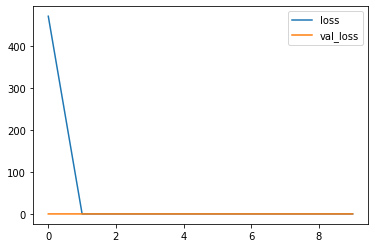

In [ ]:
# 目的関数の値
result[['loss', 'val_loss']].plot()

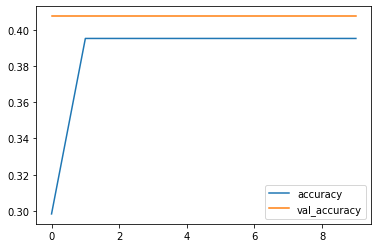

In [ ]:
# 正解率
result[['accuracy', 'val_accuracy']].plot()

### モデル精度の向上

Batch Normalization

ミニバッチごとに平均x
​¯
​​  と 標準偏差 σ を求め、


\begin{aligned} x_s &= \frac{x-\bar x}{\sigma} \\\\ \hat x &= \alpha x_s + \beta \end{aligned}

​​ 


のように x^へと各変数ごとに変換

→ 平均β, 標準偏差α　となる変換

実装としては、各バッチ毎に平均と標準偏差を定めて標準化を行うといった手法<br>
これを層に加えることで各変数間のスケールによる差を吸収できる

In [ ]:
# シードの固定
reset_seed(0)

# モデルの構築(表記パターン2)
model = tf.keras.models.Sequential([
                                    tf.keras.layers.BatchNormalization(input_shape=(10,)),
                                    tf.keras.layers.Dense(10, activation='relu'),
                                    tf.keras.layers.Dense(3, activation='softmax')
                                    ])

# モデルのコンパイル
model.compile(optimizer='SGD',
              loss='SparseCategoricalCrossentropy',
              metrics=['accuracy'])

# モデルの学習
history = model.fit(x_train, t_train,
                    batch_size=10,
                    epochs=50,
                    validation_data=(x_test, t_test))

Epoch 1/50
13/13 [==============================] - 0s 11ms/step - loss: 1.1150 - accuracy: 0.4113 - val_loss: 5.8024 - val_accuracy: 0.2407
Epoch 2/50
13/13 [==============================] - 0s 4ms/step - loss: 0.9671 - accuracy: 0.5242 - val_loss: 4.1415 - val_accuracy: 0.3519
Epoch 3/50
13/13 [==============================] - 0s 4ms/step - loss: 0.8989 - accuracy: 0.6371 - val_loss: 3.5801 - val_accuracy: 0.5741
Epoch 4/50
13/13 [==============================] - 0s 4ms/step - loss: 0.8247 - accuracy: 0.6452 - val_loss: 3.2575 - val_accuracy: 0.5926
Epoch 5/50
13/13 [==============================] - 0s 4ms/step - loss: 0.8019 - accuracy: 0.6774 - val_loss: 3.0392 - val_accuracy: 0.5926
Epoch 6/50
13/13 [==============================] - 0s 4ms/step - loss: 0.6577 - accuracy: 0.8065 - val_loss: 2.7884 - val_accuracy: 0.5741
Epoch 7/50
13/13 [==============================] - 0s 4ms/step - loss: 0.5698 - accuracy: 0.8548 - val_loss: 2.5585 - val_accuracy: 0.5741
Epoch 8/50
13/13 [=

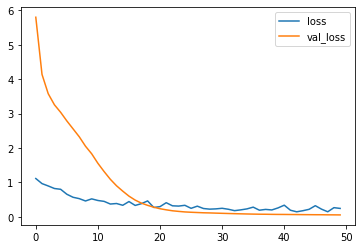

In [ ]:
# accuracyとlossをDataFrameに
result_batchnorm = pd.DataFrame(history.history)

# 目的関数の値
result_batchnorm[['loss', 'val_loss']].plot()

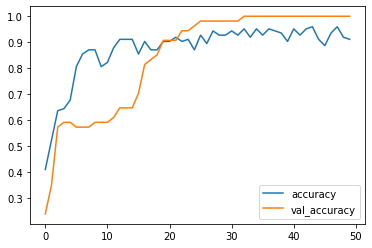

In [ ]:
# 正解率
result_batchnorm[['accuracy', 'val_accuracy']].plot()

### 学習済みモデルの保存と推論

In [ ]:
# モデルの保存
model.save(filepath='wine_model.h5', save_format='h5')

# save_formatはHDF5 or Saved Modelを指定

In [ ]:
# ロード
loaded_model = tf.keras.models.load_model('wine_model.h5')

予測値の計算

In [ ]:
# データの準備
sample = x_train[0]
sample.shape

(10,)

In [ ]:
# 予測値の計算
loaded_model.predict(sample)

ValueError: ignored

(10,) という形状を予想していたのに、(1,) として値が入力されていますよ<br>
注意: 推論で使用する際には、(バッチサイズ, 入力変数の数) という形式となっていないと上記のようなエラー<br>
ex) 今回であれば、(1, 10) が望ましいデータの形

In [ ]:
# 形を変換
sample = sample.reshape(1, 10)

# 再計算
y = loaded_model.predict(sample)
y

array([[0.9737636 , 0.00732896, 0.01890747]], dtype=float32)

In [ ]:
# 最大のラベル
np.argmax(y)

0

In [ ]:
# 正解ラベル
t_train[0]

0

実際にはさらに複雑なモデルを構築することになることも多い<br>
→ その場合には Functional API や Subclassing API を使用<br>
しかし、気軽に試してみたい場合などには本章の流れを振り返りながら Sequential API を積極的に使用すべし